In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('monthly_champagne_sales.csv')


In [4]:
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [5]:
df.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [8]:
df.set_index('Month', inplace=True)

In [9]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [10]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot: xlabel='Month'>

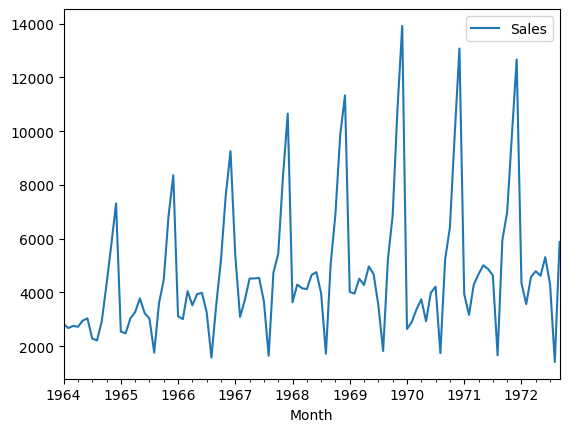

In [11]:
df.plot()

In [13]:
## testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result = adfuller(df['Sales'])

In [15]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276184
p-value : 0.36391577166024713
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [18]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [19]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot: xlabel='Month'>

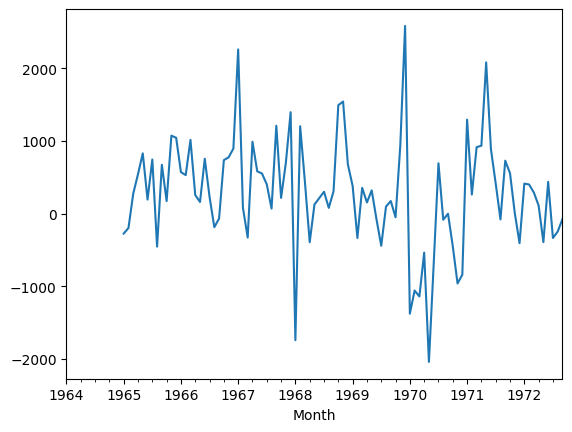

In [21]:
df['Seasonal First Difference'].plot()

In [ ]:
## ARIMA (AutoRegressive Integrated Moving Average) model
## Identification of AR (AutoRegressive) model is ofeten best done with PACF (Partial Autocorrelation Function)
## Identification of MA (Moving Average) model is ofeten best done with ACF (Autocorrelation Function)
## p: AR model lags
## d: number of times the data is differenced
## q: MA model lags

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

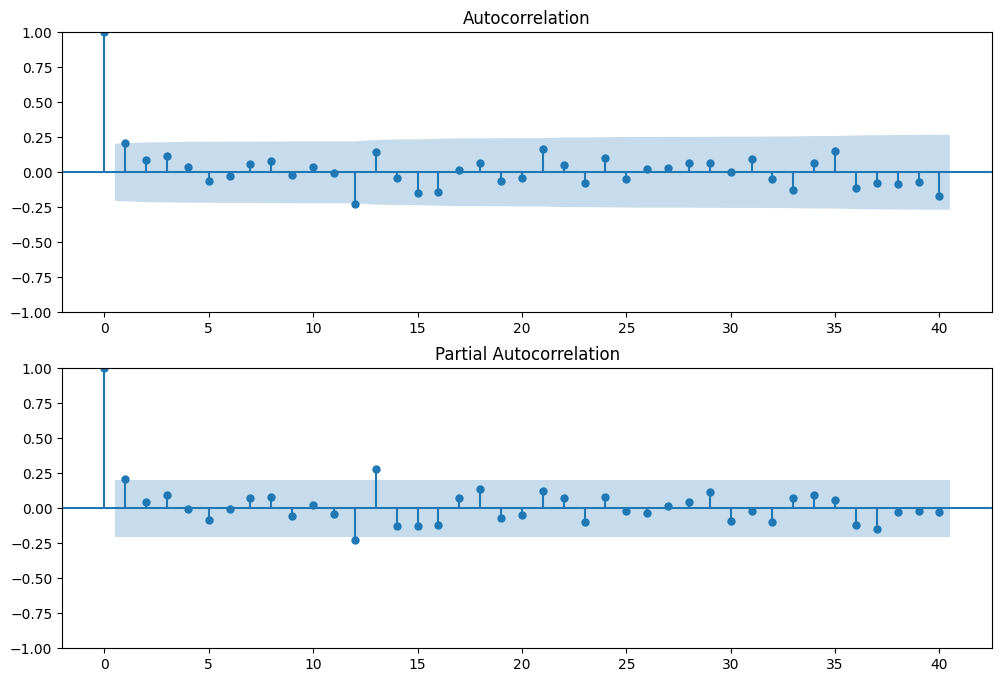

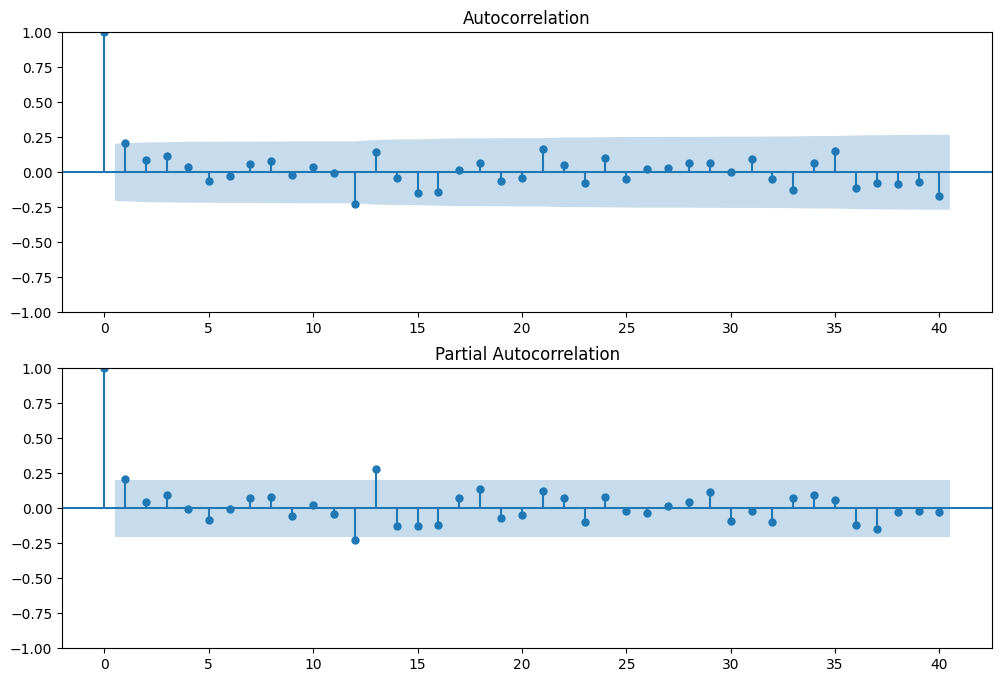

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
## for "p" we look at PACF, it shuts off at 1 because there is a sudden decrease so the value for p=1
## for "q" we look at ACF, it should taper of to zero (slowly decreases to zero), in this case it doesnt show that pattern so assume q=0 or q=1
## we are focusing more on AR model thats why q can be assumed as 0.
## Since we only shifted once for seasonal difference we assume d=1

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model = ARIMA(df['Sales'],order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -966.444
Date:                Thu, 21 Dec 2023   AIC                           1936.888
Time:                        15:41:38   BIC                           1942.177
Sample:                    01-01-1964   HQIC                          1939.031
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0917      0.152     -0.603      0.547      -0.390       0.206
sigma2       6.97e+06   8.84e+05      7.885      0.000    5.24e+06     8.7e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               109.37
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                            -1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='Month'>

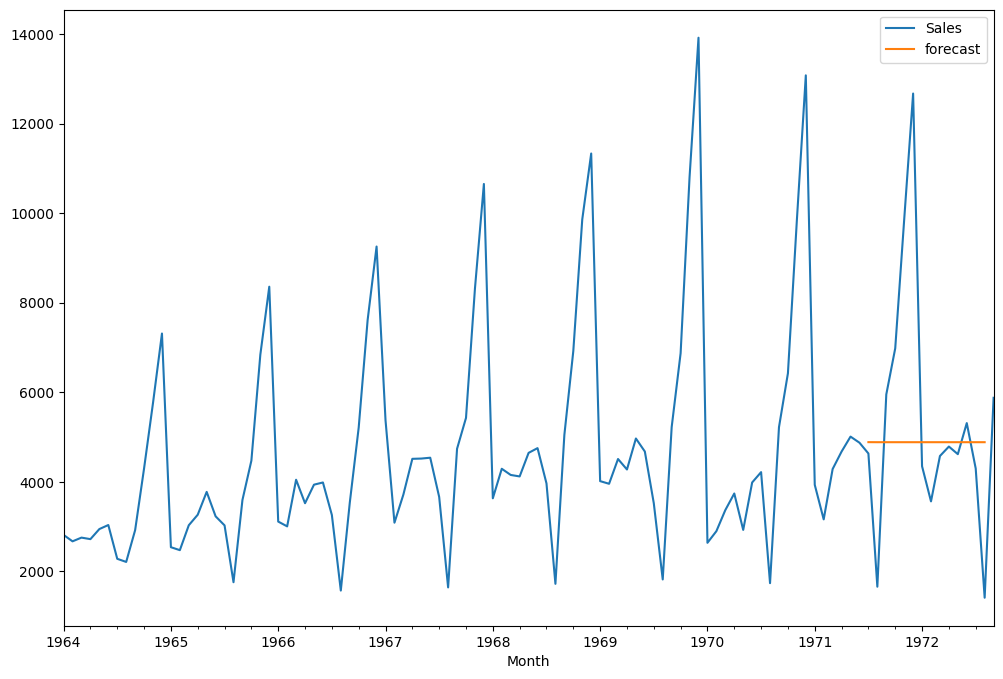

In [30]:
df['forecast']= model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [31]:
import statsmodels.api as sm

In [36]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot: xlabel='Month'>

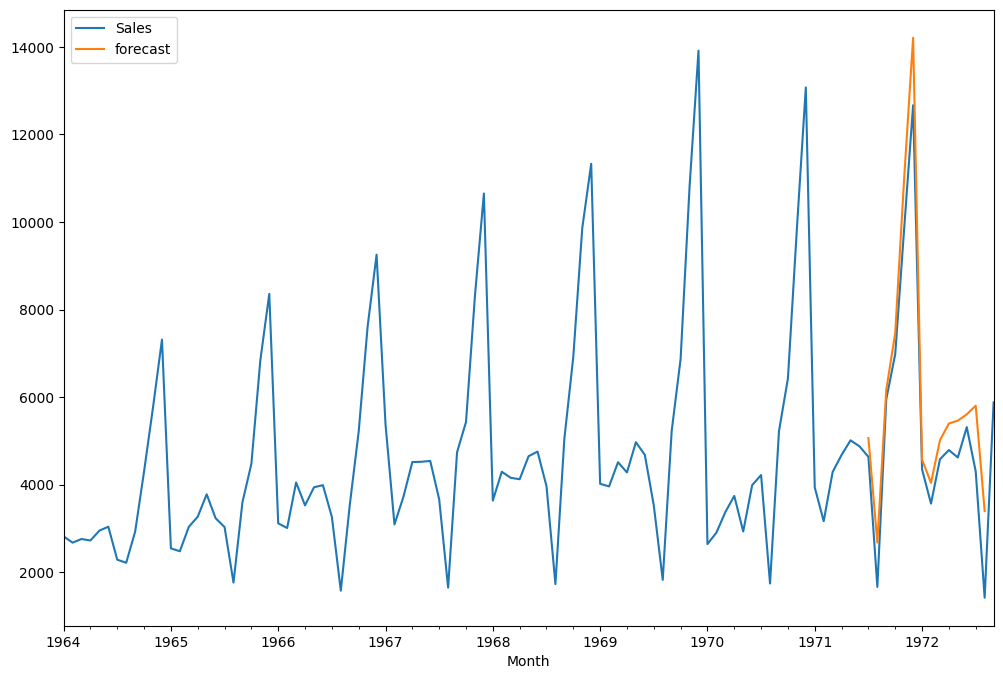

In [33]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


<AxesSubplot: >

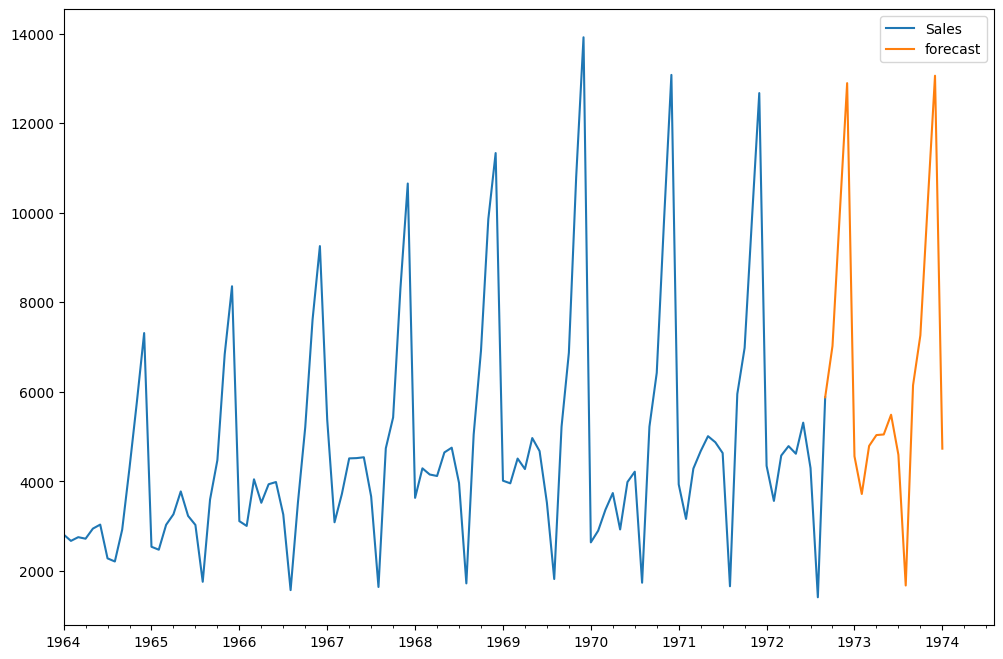

In [37]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))